In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.DataFrame([[8,8,4], [7,9,5], [6,10,6], [5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])

In [12]:
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [13]:
def initialize_parameters(layer_dims):
    np.random.seed(3)

    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        # each col represens the weights associated with a node/neuron
        # each row represents the weights for an input feature
        parameters["W" + str(l)] = np.ones((layer_dims[l-1], layer_dims[l])) * 0.1
        # contains all the bias terms; one per neuron/node
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1)) 

    return parameters

In [14]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [15]:
def linear_forward(A_prev, W, b):
    Z = np.dot(W.T, A_prev) + b
    return Z

In [20]:
def L_layer_forward(X, parameters):
    A = X
    L = len(parameters) // 2

    for l in range(1, L+1):
        A_prev = A
        W = parameters["W" + str(l)]
        b = parameters["b" + str(l)]

        A = linear_forward(A_prev, W, b)

    return A, A_prev

In [21]:
X = df[["cgpa", "profile_score"]].values[0].reshape(2, 1) # Shape(num of features, number of training examples)
y = df["lpa"].values[0]

parameters = initialize_parameters([2, 2, 1])
y_hat, A1 = L_layer_forward(X, parameters)

y_hat = y_hat[0][0]

In [22]:
def update_parameters(parameters, y, y_hat, lr, A1, X):
    parameters["W2"][0][0] += (lr * 2 * (y-y_hat) * A1[0][0])
    parameters["W2"][1][0] += (lr * 2 * (y-y_hat) * A1[1][0])
    parameters["b2"][0][0] += (lr * 2 * (y-y_hat))

    parameters["W1"][0][0] += (lr * 2 * (y-y_hat) * parameters["W2"][0][0] * X[0][0])
    parameters["W1"][0][1] += (lr * 2 * (y-y_hat) * parameters["W2"][0][0] * X[1][0])
    parameters["b1"][0][0] += (lr * 2 * (y-y_hat) * parameters["W2"][0][0])

    parameters["W1"][1][0] += (lr * 2 * (y-y_hat) * parameters["W2"][1][0] * X[0][0])
    parameters["W1"][1][1] += (lr * 2 * (y-y_hat) * parameters["W2"][1][0] * X[1][0])
    parameters["b1"][1][0] += (lr * 2 * (y-y_hat) * parameters["W2"][1][0])

In [23]:
parameters

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [24]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 5

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['lpa']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters, y, y_hat, 0.001, A1, X)

    Loss.append((y-y_hat)**2)

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  26.28249792398698
Epoch -  2 Loss -  19.438253848220803
Epoch -  3 Loss -  10.13987443582752
Epoch -  4 Loss -  3.385561305106485
Epoch -  5 Loss -  1.3198454128484565


{'W1': array([[0.273603  , 0.3993222 ],
        [0.28787155, 0.42586102]]),
 'b1': array([[0.02885522],
        [0.03133223]]),
 'W2': array([[0.42574893],
        [0.50219328]]),
 'b2': array([[0.11841278]])}

In [25]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input

In [26]:
model = Sequential()

model.add(Input((2, )))
model.add(Dense(2, activation='linear'))
model.add(Dense(1, activation='linear'))

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.get_weights()

[array([[-0.78109443,  0.53910506],
        [ 0.2456665 ,  0.63265693]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.5288381],
        [-1.3383431]], dtype=float32),
 array([0.], dtype=float32)]

In [29]:
new_weights = [np.array([[0.1, 0.1], [0.1, 0.1]], dtype=np.float32),
              np.array([0, 0], dtype=np.float32),
              np.array([[0.1], [0.1]], dtype=np.float32),
              np.array([0], dtype=np.float32)]

model.set_weights(new_weights)

In [30]:
model.get_weights()

[array([[0.1, 0.1],
        [0.1, 0.1]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.1],
        [0.1]], dtype=float32),
 array([0.], dtype=float32)]

In [31]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

In [35]:
X_train = df[["cgpa", "profile_score"]].values
y_train = df[["lpa"]].values
history = model.fit(X_train, y_train, epochs=75, verbose=1, batch_size=1)

Epoch 1/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 1.0769 
Epoch 2/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 1.6505 
Epoch 3/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 1.3957 
Epoch 4/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 1.2484 
Epoch 5/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 1.7423 
Epoch 6/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 1.3598 
Epoch 7/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.7261    
Epoch 8/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 1.2181
Epoch 9/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.6979 
Epoch 10/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.9910 
Epoch 11/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 1.3386
Epoch 12/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 

In [33]:
model.get_weights()

[array([[0.3732734 , 0.3732734 ],
        [0.36537156, 0.36537156]], dtype=float32),
 array([0.2720231, 0.2720231], dtype=float32),
 array([[0.37263215],
        [0.37263215]], dtype=float32),
 array([0.20460513], dtype=float32)]

In [34]:
import matplotlib.pyplot as plt

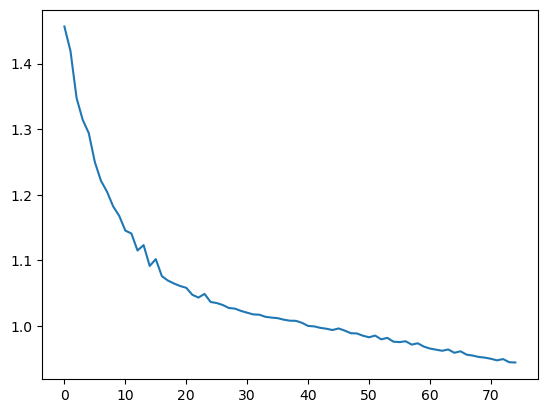

In [37]:
plt.plot(history.history["loss"])
plt.show()